<a href="https://colab.research.google.com/github/Majeed1982/portfolio/blob/main/TF_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.17.0


This code snippet is designed to install TensorFlow and verify that it's set up correctly, particularly in a Colab environment. Let's break it down step by step:

1. # !pip install -q tensorflow-gpu==2.0.0-beta1
This is a commented-out line, meaning it's not currently active. If you remove the #, it would install a specific version of TensorFlow (version 2.0.0-beta1) with GPU support. Here's the breakdown:
pip install: Command to install Python packages.
-q: Quiet mode (suppresses the output of the installation process).
tensorflow-gpu==2.0.0-beta1: This specifies that you're trying to install TensorFlow version 2.0.0-beta1, which has support for running on GPUs.
Since the line is commented out, the installation command will not run. You can remove the # to install the package.

2. try: %tensorflow_version 2.x # Colab only.
%tensorflow_version 2.x is a magic command in Google Colab that switches the TensorFlow version to 2.x, ensuring you're using TensorFlow 2.x (and not an older version like 1.x).
The try block is used to run this command in Colab, and if this code is run in a non-Colab environment (e.g., your local machine), the command would fail.
The # Colab only. comment indicates that this command only works in Colab.
3. except Exception: pass
If the %tensorflow_version command fails (likely because you're not using Colab), this except block ensures that the program will continue without crashing. It does nothing (pass) when the exception is encountered.
4. import tensorflow as tf
This imports the TensorFlow library, giving you access to its functions and tools for machine learning and deep learning. tensorflow is imported with the alias tf, so you can reference it easily (e.g., tf.function()).
5. print(tf.__version__)
This prints the version of TensorFlow that is currently installed and being used. It's a common way to verify that the installation was successful and that the correct version is in use.
Overall Purpose
The script:

Tries to switch to TensorFlow 2.x in Google Colab.
Imports TensorFlow.
Prints the installed TensorFlow version, allowing you to verify whether everything is correctly set up.
If this code runs successfully, it will display the version of TensorFlow you have installed.

In [ ]:
# Load in the data
from sklearn.datasets import load_breast_cancer

In [ ]:
# load the data
data = load_breast_cancer()

In [ ]:
# check the type of 'data'
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [ ]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [ ]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
# Get the number of samples (N) and number of features (D) in the training set (X_train)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

# test_size=0.33: This specifies that 33% of the data will be set aside for the test set, while
# 'N' represents the number of training samples (rows), and 'D' represents the number of features (columns).

In [ ]:
# Scale the data to ensure all features contribute equally to the model training
# Scaling is important for many machine learning algorithms, particularly those
# that rely on distance calculations or gradient descent. You'll learn more about
# why scaling is needed in a later course.

from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
# This standardizes the training data by removing the mean and scaling to unit variance
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaling parameters from the training data
# This ensures that the test data is scaled consistently with the training data
X_test = scaler.transform(X_test)


In [ ]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# The shape=(D,) specifies that the input data will have D features (columns).
# D comes from the earlier line where you defined it as the number of features in your training data.

# This model is essentially implementing a logistic regression, but within a neural network framework.
# It takes in D input features and produces a single output (between 0 and 1) using the sigmoid function.

# Logistic regression is a statistical method used for binary classification, meaning it predicts the probability that a given input belongs to one of two
# possible categories or classes. While the name "regression" suggests a continuous output, logistic regression actually maps inputs to a probability that
# falls between 0 and 1, which can be used to classify data into categories (e.g., 0 or 1).

# This output is interpreted as a probability for class 1 (positive class).
# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# In a neural network, the model learns by adjusting the weights (values that affect how inputs are transformed into outputs) to minimize errors or loss.
# Optimizers tell the model how to change its weights so that it makes fewer mistakes in the future.



# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

# model.fit() trains your model on the training data X_train and y_train.
# It also checks the model's performance on the validation data X_test and y_test.
# The model runs through the data 100 times (epochs=100) to adjust and optimize its parameters.

# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

# print("Train score:", model.evaluate(X_train, y_train)):
# This line evaluates how well the model performs on the training dataset (X_train, y_train), where it learned the patterns during training.
# It prints the result as the train score (loss and accuracy).

# rint("Test score:", model.evaluate(X_test, y_test)):
# This line evaluates the model's performance on the test dataset (X_test, y_test), which is unseen by the model during training.
# It prints the result as the test score (loss and accuracy).

# Train score: [0.2, 0.95]  # This means loss is 0.2, accuracy is 95% on training data
# Test score: [0.25, 0.92]  # This means loss is 0.25, accuracy is 92% on test data

# Summary:
# model.evaluate() checks how well the model performs on both the training data and the test data.
# It returns loss (error) and accuracy (correctness) for both datasets.
# Evaluating on both datasets ensures the model is performing well and not overfitting.

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.2653 - loss: 1.1563 - val_accuracy: 0.3138 - val_loss: 1.0042
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3343 - loss: 0.9901 - val_accuracy: 0.3564 - val_loss: 0.9209
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3769 - loss: 0.9010 - val_accuracy: 0.4202 - val_loss: 0.8430
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4935 - loss: 0.8238 - val_accuracy: 0.5053 - val_loss: 0.7748
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5626 - loss: 0.7168 - val_accuracy: 0.5479 - val_loss: 0.7139
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6314 - loss: 0.6534 - val_accuracy: 0.6011 - val_loss: 0.6614
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6787 - loss: 0.5947 - val_accuracy: 0.6489 - val_loss: 0.6154
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7231 - loss: 0.5861 - val_accuracy: 0.69

Explanation:
tf.keras.models.Sequential([]):

This defines a sequential model, which means that the layers will be stacked one after another in a linear manner.
A sequential model is ideal when your model consists of a simple sequence of layers without branching or complex connections.
tf.keras.layers.Input(shape=(D,)):

This defines the input layer of the model.
The shape=(D,) argument means that the model expects input data with D features (where D is a placeholder for the number of features or dimensions in your input data). This is usually the number of columns in your training data.
Example: If you’re working with a dataset that has 30 features, like the breast cancer dataset from earlier, you would set D = 30.
tf.keras.layers.Dense(1, activation='sigmoid'):

Dense is a fully connected (or dense) layer, meaning each neuron in the layer is connected to every neuron in the previous layer.
1: This indicates that the output layer has 1 neuron. In binary classification, we need only one output neuron because the model is predicting one of two classes (0 or 1).
activation='sigmoid': The sigmoid activation function is used in the output layer for binary classification tasks. The sigmoid function squashes the output to a range between 0 and 1, which represents the probability of the class being 1 (positive class).
If the output is close to 1, it indicates that the model predicts the positive class (e.g., benign).
If the output is close to 0, it predicts the negative class (e.g., malignant).
Purpose of this Model:
This model is a logistic regression-like model but implemented using a neural network framework.
It’s useful for binary classification problems, such as determining whether a breast cancer tumor is malignant (0) or benign (1).
The single neuron with the sigmoid activation function gives a probability that the input belongs to class 1 (positive class).
Example of How It Works:
You feed the model an input vector (like a patient's medical features).
The model processes the input through the dense layer.
The single neuron in the output layer produces a number between 0 and 1 (after applying the sigmoid function), which can be interpreted as the probability of the input belonging to the positive class.
Summary:
Input layer: Accepts input data with D features.
Dense layer: Contains 1 neuron, outputting a probability (between 0 and 1) for binary classification.
Sigmoid activation: Converts the output into a probability for the positive class.
This is a very basic neural network model but is useful for tasks like binary classification. You can later add more layers and complexity if needed!

Step 1: The formula for the sigmoid function is:
𝜎
(
𝑥
)
=
1
1
+
𝑒
−
𝑥
σ(x)=
1+e
−x

1
​

Step 2: Substitute
𝑥
=
2
x=2 into the formula:
𝜎
(
2
)
=
1
1
+
𝑒
−
2
σ(2)=
1+e
−2

1
​

Step 3: Calculate
𝑒
−
2
e
−2
 :
To make it simple,
𝑒
e is approximately 2.718, so:

𝑒
−
2
=
1
𝑒
2
=
1
2.71
8
2
≈
1
7.389
≈
0.135
e
−2
 =
e
2

1
​
 =
2.718
2

1
​
 ≈
7.389
1
​
 ≈0.135
So,
𝑒
−
2
≈
0.135
e
−2
 ≈0.135.

Step 4: Now plug that value back into the sigmoid formula:
𝜎
(
2
)
=
1
1
+
0.135
σ(2)=
1+0.135
1
​

Step 5: Simplify the denominator:
1
+
0.135
=
1.135
1+0.135=1.135
Step 6: Now, divide:
𝜎
(
2
)
=
1
1.135
≈
0.88
σ(2)=
1.135
1
​
 ≈0.88
Final Answer:
So, when
𝑥
=
2
x=2, the sigmoid function gives you a value of approximately 0.88.

Summary of Steps:
Start with the sigmoid formula.
Substitute the value of
𝑥
x.
Calculate
𝑒
−
𝑥
e
−x
 .
Plug that into the formula and simplify.
Get the result!
This means that for an input of
𝑥
=
2
x=2, the sigmoid function returns 0.88, which is a number between 0 and 1, as expected.

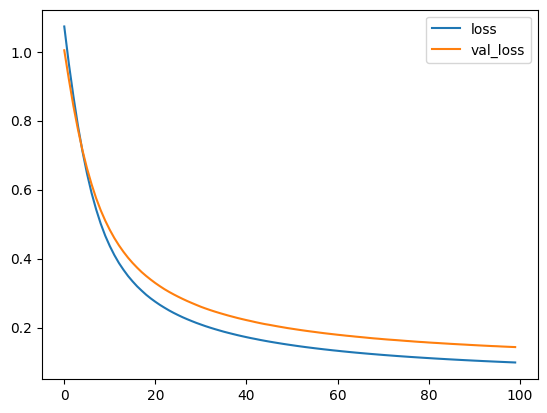

In [ ]:
# Plot what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# plt.legend():
# This command adds a legend to the plot, helping distinguish between the training loss and validation loss lines.
# What the Plot Represents:
# The x-axis represents the epochs (how many times the model has been trained on the entire dataset).
# The y-axis represents the loss (how far the model’s predictions are from the actual target values).
# Loss typically decreases over time as the model learns.
# The 'loss' line shows how the model's error decreases on the training data.
# The 'val_loss' line shows how the error decreases on the validation (test) data.

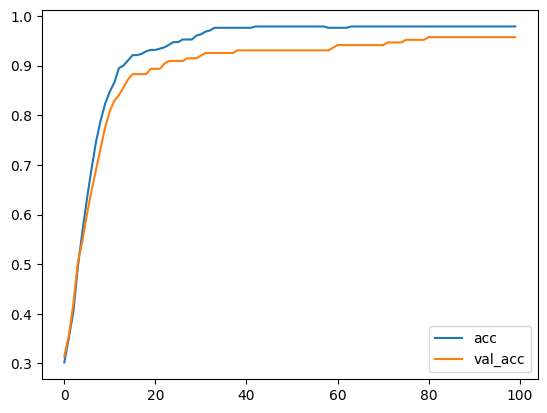

In [ ]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

#Part 2: Making Predictions
This goes with the lecture "Making Predictions"#

In [ ]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[8.67233992e-01]
 [5.43092072e-01]
 [9.45117354e-01]
 [6.45894051e-01]
 [9.63507295e-01]
 [8.78048658e-01]
 [9.89925325e-01]
 [8.48447800e-01]
 [2.70878372e-04]
 [9.95128036e-01]
 [9.64515626e-01]
 [2.69836318e-02]
 [8.10441226e-02]
 [9.64284539e-01]
 [9.71753836e-01]
 [9.88930762e-01]
 [7.47945845e-01]
 [2.74063088e-02]
 [9.73291159e-01]
 [3.72842606e-03]
 [9.71274078e-01]
 [9.84665513e-01]
 [9.05266047e-01]
 [9.68257725e-01]
 [8.48266065e-01]
 [1.25666231e-01]
 [3.75269428e-02]
 [5.20245265e-03]
 [1.64311957e-02]
 [9.98196006e-01]
 [9.61581051e-01]
 [1.47124156e-01]
 [9.91090000e-01]
 [6.51792526e-01]
 [9.17625248e-01]
 [9.98120606e-01]
 [8.88082385e-01]
 [9.92599726e-01]
 [3.60671147e-05]
 [9.97846782e-01]
 [9.77611184e-01]
 [8.98935497e-01]
 [1.35017648e-01]
 [8.62448514e-01]
 [3.00193060e-04]
 [9.83903468e-01]
 [1.32535025e-03]
 [9.52795565e-01]
 [9.51785922e-01]
 [1.07239373e-01]
 [1.27927306e-05]
 [9.74080265e-01]
 [4.74692293e-04]
 [9.5884

In [ ]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)

# Round the predicted probabilities to get the actual class predictions (0 or 1)
# This converts probabilities >= 0.5 to 1 and < 0.5 to 0.
# The predictions are then flattened from shape (N, 1) to (N,)
# to match the shape of the target values for easier comparison.

import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0.]


In [ ]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9574468085106383
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9637 - loss: 0.1459 
Evaluate output: [0.14320972561836243, 0.957446813583374]


#Part 3: Saving and Loading a Model#
This goes with the lecture "Saving and Loading a Model"

In [ ]:
# Let's now save our model to a file
# Save the trained model to a file for future use
# This saves the model architecture, weights, and training configuration
# in HDF5 format, allowing for easy loading and deployment later.
model.save('linearclassifier.h5')

In [ ]:
# Check that the model file exists
# Check that the model file exists by listing all files in the current directory
# The command 'ls -lh' provides detailed information about each file,
# including file size in a human-readable format, allowing us to confirm
# that 'linearclassifier.h5' has been created and saved successfully.
!ls -lh

total 24K
-rw-r--r-- 1 root root  18K Oct 20 08:52 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Oct 17 13:21 sample_data


In [ ]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9637 - loss: 0.1459  


[0.14320972561836243, 0.957446813583374]

In [ ]:
# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('linearclassifier.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>